In [42]:
#coding:utf-8
import numpy as np
from sklearn import mixture

obs = np.loadtxt('dataset/X.txt')
clf = mixture.GMM(n_components=3, covariance_type='diag', init_params='random')
clf.fit(obs)
prediction = clf.predict(obs)
mu1 = np.mean(np.array([obs[i] for i in range(len(prediction)) if prediction[i] == 0]), axis=0)
mu2 = np.mean(np.array([obs[i] for i in range(len(prediction)) if prediction[i] == 1]), axis=0)
mu3 = np.mean(np.array([obs[i] for i in range(len(prediction)) if prediction[i] == 2]), axis=0)
print(mu1)
print(mu2)
print(mu3)

[2.99520441 3.9792929  4.93552594 4.95000613 6.02926365]
[-3.06176428 -3.9669624  -5.02048769 -5.02021252 -6.00420335]
[ 0.01052503  0.00416619  0.01356839  0.01002079 -0.02474435]


/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecatio

In [43]:
var1 = np.var(np.array([obs[i] for i in range(len(prediction)) if prediction[i] == 0]), axis=0)
var2 = np.var(np.array([obs[i] for i in range(len(prediction)) if prediction[i] == 1]), axis=0)
var3 = np.var(np.array([obs[i] for i in range(len(prediction)) if prediction[i] == 2]), axis=0)
print(var1)
print(var2)
print(var3)

[1.03299743 0.98288573 1.00309605 0.95362697 0.91997963]
[0.97811425 0.87637002 1.01171168 1.00680363 0.97677567]
[0.24906518 0.25509264 0.23859868 0.25036301 0.23618642]


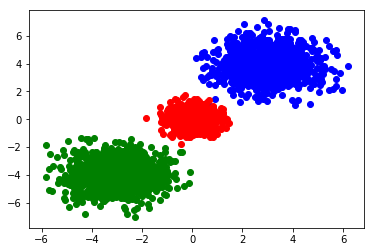

In [44]:
import matplotlib.pyplot as plt
plt.figure()
x1_b = [obs[i][0] for i in range(len(prediction)) if prediction[i] == 0]
x2_b = [obs[i][1] for i in range(len(prediction)) if prediction[i] == 0]
plt.scatter(x1_b, x2_b, c = 'b')
x1_g = [obs[i][0] for i in range(len(prediction)) if prediction[i] == 1]
x2_g = [obs[i][1] for i in range(len(prediction)) if prediction[i] == 1]
plt.scatter(x1_g, x2_g, c = 'g')
x1_r = [obs[i][0] for i in range(len(prediction)) if prediction[i] == 2]
x2_r = [obs[i][1] for i in range(len(prediction)) if prediction[i] == 2]
plt.scatter(x1_r, x2_r, c = 'r')
plt.savefig('5_2_1.jpg')
plt.show()

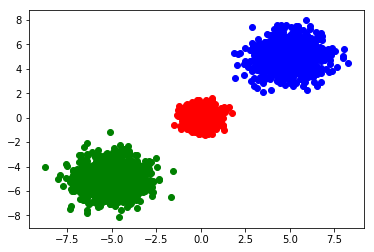

In [45]:
plt.figure()
x1_b = [obs[i][2] for i in range(len(prediction)) if prediction[i] == 0]
x2_b = [obs[i][3] for i in range(len(prediction)) if prediction[i] == 0]
plt.scatter(x1_b, x2_b, c = 'b')
x1_g = [obs[i][2] for i in range(len(prediction)) if prediction[i] == 1]
x2_g = [obs[i][3] for i in range(len(prediction)) if prediction[i] == 1]
plt.scatter(x1_g, x2_g, c = 'g')
x1_r = [obs[i][2] for i in range(len(prediction)) if prediction[i] == 2]
x2_r = [obs[i][3] for i in range(len(prediction)) if prediction[i] == 2]
plt.scatter (x1_r, x2_r, c = 'r')
plt.savefig('5_2_3.jpg')
plt.show()

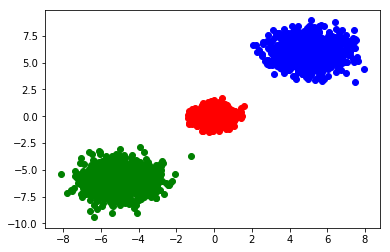

In [46]:
plt.figure()
x1_b = [obs[i][3] for i in range(len(prediction)) if prediction[i] == 0]
x2_b = [obs[i][4] for i in range(len(prediction)) if prediction[i] == 0]
plt.scatter(x1_b, x2_b, c = 'b')
x1_g = [obs[i][3] for i in range(len(prediction)) if prediction[i] == 1]
x2_g = [obs[i][4] for i in range(len(prediction)) if prediction[i] == 1]
plt.scatter(x1_g, x2_g, c = 'g')
x1_r = [obs[i][3] for i in range(len(prediction)) if prediction[i] == 2]
x2_r = [obs[i][4] for i in range(len(prediction)) if prediction[i] == 2]
plt.scatter(x1_r, x2_r, c = 'r')
plt.savefig('5_2_3.jpg')
plt.show()

In [47]:
import numpy as np
import matplotlib.pyplot as plt
class GaussianMixtureModel(object):
    def __init__(self):
        self.ass = None
        
    def fit(self, obs, sigma, pai):
        self.dimension = obs.shape[1]
        self.k = len(sigma)
        self.sigma = sigma
        self.pai = pai
        self.obs = obs[:]
        self.mu = obs[:self.k]
        
        self.ori_prob = -float("inf")
        index = 0
        for i in range(100):
            ttl_prob = self.expectation()
            if(ttl_prob - self.ori_prob < 1e-3):
                break
            self.ori_prob = ttl_prob
            self.maxi()
            self.plot(index)
            index += 1
        return self.ass
        
    def expectation(self):
        log_prob = self.logProb()
        prob = np.exp(log_prob)
        self.ass = prob/np.sum(prob, axis = 1, keepdims = True) # N x K
        ttl_prob = np.sum(prob, axis = 1)
        ttl_prob = np.sum(np.log(ttl_prob))
        return ttl_prob
            
    def maxi(self):
        for k in range(self.k):
            temp = np.sum(self.obs * self.ass[:, [k]], axis = 0)
            self.mu[k] = temp / np.sum(self.ass[:, k])
            
    def logProb(self):
        prob = [(self.obs - mu) for mu in self.mu]
        prob = [np.linalg.norm(p, axis = 1) for p in prob]
        prob = np.vstack(prob).T ** 2 # N x K
        part = np.log(self.pai)
        norm = self.dimension/2*np.log(2*np.pi*self.sigma)
        prob = part - norm - prob/(2 * self.sigma**2)
        return prob
    
    def plot(self, index):
        plt.figure()
        ass = np.argmax(self.ass, axis = 1)
        x1_b = [self.obs[i][3] for i in range(len(ass)) if ass[i] == 0]
        x2_b = [self.obs[i][4] for i in range(len(ass)) if ass[i] == 0]
        plt.scatter(x1_b, x2_b, c = 'b')
        x1_g = [self.obs[i][3] for i in range(len(ass)) if ass[i] == 1]
        x2_g = [self.obs[i][4] for i in range(len(ass)) if ass[i] == 1]
        plt.scatter(x1_g, x2_g, c = 'g')
        x1_r = [self.obs[i][3] for i in range(len(ass)) if ass[i] == 2]
        x2_r = [self.obs[i][4] for i in range(len(ass)) if ass[i] == 2]
        plt.scatter(x1_r, x2_r, c = 'r')
        plt.savefig('5_3_'+str(index)+'.jpg')
        plt.show()

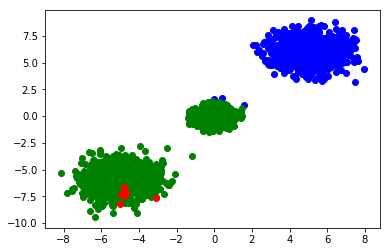

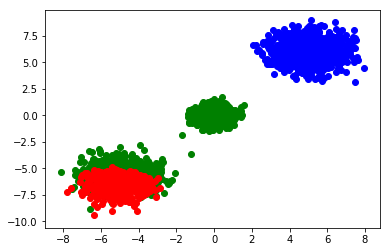

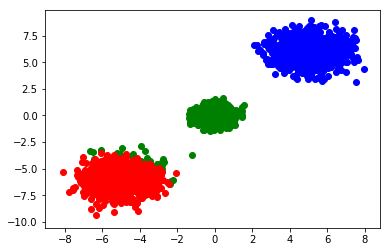

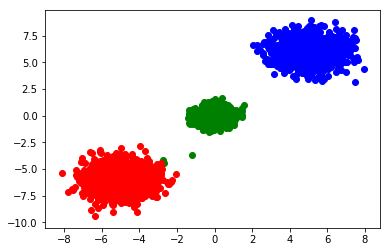

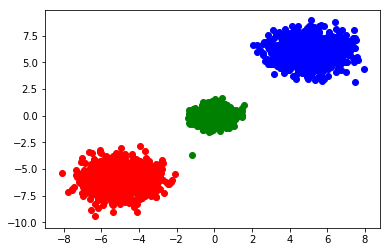

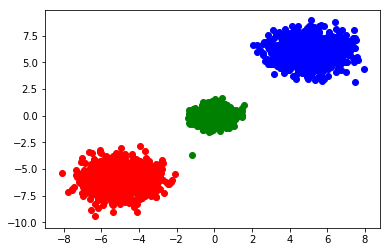

[[1.00000000e+000 2.25610889e-025 0.00000000e+000]
 [3.61202537e-025 1.00000000e+000 1.62534836e-098]
 [7.51349165e-100 1.92720773e-026 1.00000000e+000]
 ...
 [1.00000000e+000 1.61723946e-022 0.00000000e+000]
 [5.26139417e-097 9.95141281e-025 1.00000000e+000]
 [6.71848815e-025 1.00000000e+000 1.17027877e-100]]


In [48]:
gm = GaussianMixtureModel()
sigma = np.array([0.9892, 0.9849, 0.4958])
pai = np.array([1/3, 1/3, 1/3])
new_ass = gm.fit(obs, sigma, pai)
print(new_ass)